In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import LabelEncoder,OneHotEncoder,StandardScaler
from sklearn.model_selection import train_test_split,cross_val_score,cross_val_predict
from sklearn.metrics import r2_score,mean_squared_error,accuracy_score
from sklearn.ensemble import RandomForestRegressor

**Importing Dataset**

In [ ]:
df=pd.read_csv("Medical_insurance.csv")
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


**Exploratory Data Analysis**

In [ ]:
df.describe()

,age,bmi,children,charges
count,2772.000000,2772.000000,2772.000000,2772.000000
mean,39.109668,30.701349,1.101732,13261.369959
std,14.081459,6.129449,1.214806,12151.768945
min,18.000000,15.960000,0.000000,1121.873900
25%,26.000000,26.220000,0.000000,4687.797000
50%,39.000000,30.447500,1.000000,9333.014350
75%,51.000000,34.770000,2.000000,16577.779500
max,64.000000,53.130000,5.000000,63770.428010


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2772 entries, 0 to 2771
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       2772 non-null   int64  
 1   sex       2772 non-null   object 
 2   bmi       2772 non-null   float64
 3   children  2772 non-null   int64  
 4   smoker    2772 non-null   object 
 5   region    2772 non-null   object 
 6   charges   2772 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 151.7+ KB


Text(0, 0.5, 'Frequency')

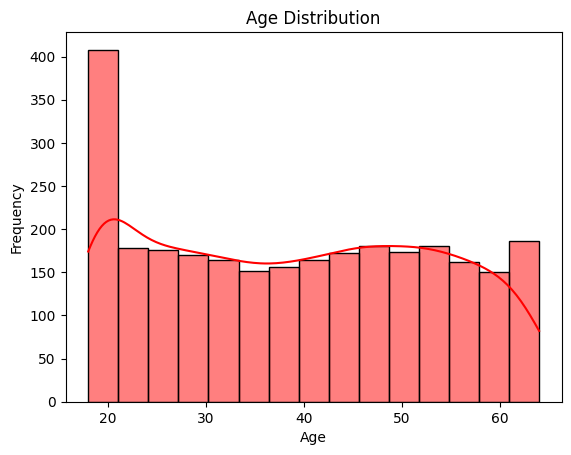

In [ ]:
sns.histplot(data=df,x='age',bins=15,kde=True,color='red')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')

Text(0, 0.5, 'Frequency')

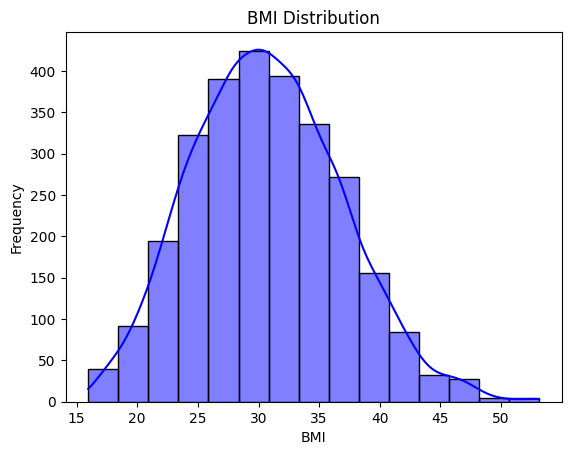

In [ ]:
sns.histplot(data=df,x='bmi',bins=15,kde=True,color='blue')
plt.title("BMI Distribution")
plt.xlabel('BMI')
plt.ylabel('Frequency')

Text(0, 0.5, 'Frequency')

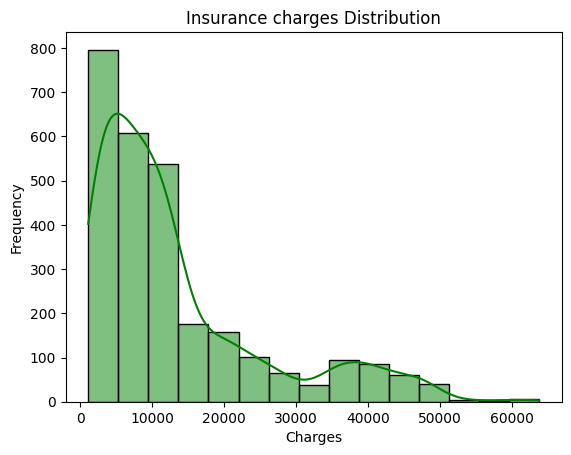

In [ ]:
sns.histplot(data=df,x='charges',bins=15,kde=True,color='green')
plt.title("Insurance charges Distribution")
plt.xlabel("Charges")
plt.ylabel('Frequency')

Text(0, 0.5, 'Medical Charges')

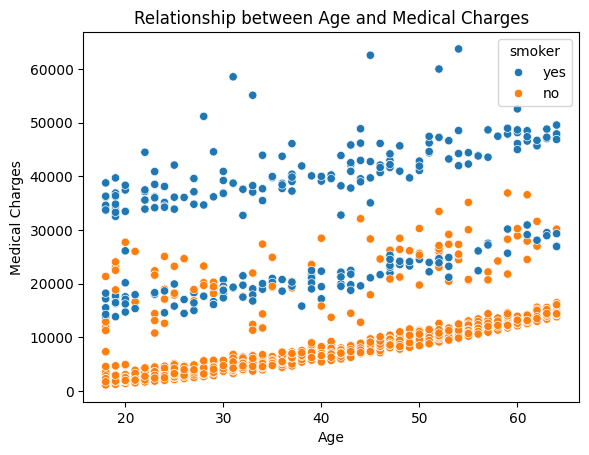

In [ ]:
sns.scatterplot(data=df,x='age',y='charges',hue='smoker')
plt.title('Relationship between Age and Medical Charges')
plt.xlabel('Age')
plt.ylabel('Medical Charges')
#This denotes that people with no smoking habits pay less as compared to people with smoking habits irrespective of what age they are

Text(0, 0.5, 'Medical Charges')

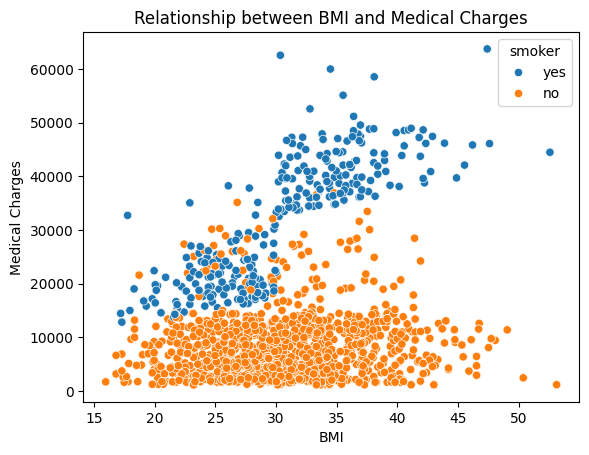

In [ ]:
sns.scatterplot(data=df,x='bmi',y='charges',hue='smoker')
plt.title('Relationship between BMI and Medical Charges')
plt.xlabel('BMI')
plt.ylabel('Medical Charges')
#this graph denotes that as BMI increases for smokers their medical charges also increases but for non smokers there is no direct correlation with medical charges and BMI

In [ ]:
le=LabelEncoder()

for column in df.columns:
  if df[column].dtype=='object':
    df[column]=le.fit_transform(df[column])

df.corr()

,age,sex,bmi,children,smoker,region,charges
age,1.000000,-0.026046,0.113048,0.037574,-0.023286,0.000932,0.298624
sex,-0.026046,1.000000,0.042924,0.016020,0.082326,0.004808,0.062837
bmi,0.113048,0.042924,1.000000,-0.001492,0.011489,0.159178,0.199846
children,0.037574,0.016020,-0.001492,1.000000,0.006362,0.016111,0.066442
smoker,-0.023286,0.082326,0.011489,0.006362,1.000000,-0.006751,0.788783
region,0.000932,0.004808,0.159178,0.016111,-0.006751,1.000000,-0.013530
charges,0.298624,0.062837,0.199846,0.066442,0.788783,-0.013530,1.000000


In [ ]:
df.drop(columns=['region'],inplace=True)
# we dropped 'region' column because it had negative correlation with the target variable - 'charges'

In [ ]:
df.head()

,age,sex,bmi,children,smoker,charges
0,19,0,27.900,0,1,16884.92400
1,18,1,33.770,1,0,1725.55230
2,28,1,33.000,3,0,4449.46200
3,33,1,22.705,0,0,21984.47061
4,32,1,28.880,0,0,3866.85520


Text(0.5, 1.0, 'Matrix Correlation')

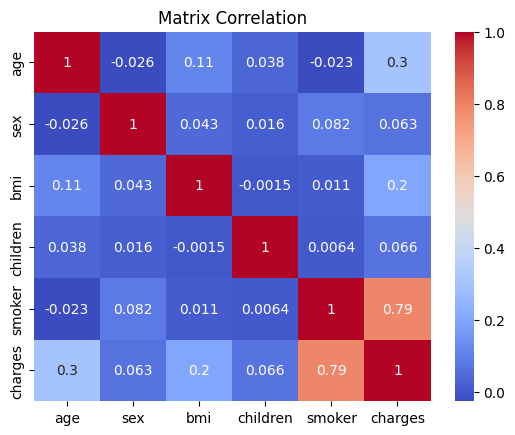

In [ ]:
sns.heatmap(df.corr(),annot=True,cmap='coolwarm')
plt.title('Matrix Correlation')

**Model Building and Evaluation**

In [ ]:
#Linear Regression
x=df.drop(columns=['charges'])
y=df['charges']

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [ ]:
#Standard Scaler
scaler=StandardScaler()
num_features=['age','bmi','children']
x_train[num_features]=pd.DataFrame(scaler.fit_transform(x_train[num_features]),columns=num_features, index=x_train.index)
x_test[num_features]=pd.DataFrame(scaler.fit_transform(x_test[num_features]),columns=num_features,index=x_test.index)

In [ ]:
lr=LinearRegression()
lr.fit(x_train,y_train)

LinearRegression()

In [ ]:
y_predict=lr.predict(x_test)

In [ ]:
print("The R2 Score:",r2_score(y_predict,y_test))
print("Mean Squared Error:",mean_squared_error(y_predict,y_test))

The R2 Score: 0.6208038314621007
Mean Squared Error: 40020600.99639668


Text(0, 0.5, 'Predictions')

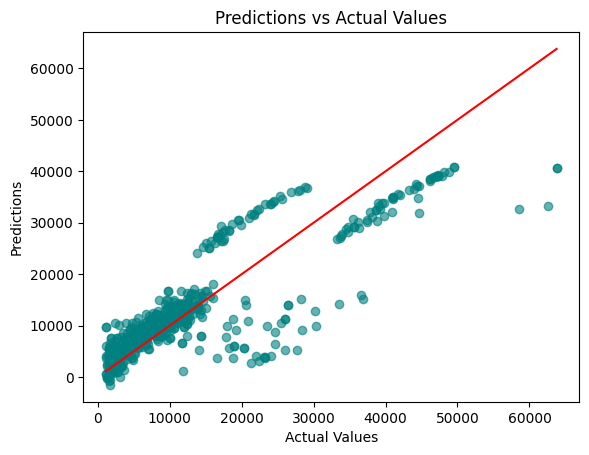

In [ ]:
plt.scatter(y_test, y_predict, alpha=0.6, color='teal')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red')
plt.title('Predictions vs Actual Values')
plt.xlabel('Actual Values')
plt.ylabel('Predictions')

In [49]:
#Cross Validation
from sklearn.model_selection import cross_val_score

Rcross = cross_val_score(lr,x,y,cv=4)
Mean = Rcross.mean()
Std_dev = Rcross.std()

print("The mean is: ",Mean)
print("The standard deviation is: ",Std_dev)

The mean is:  0.7489298219781654
The standard deviation is:  0.0021871878720921556


In [51]:
from sklearn.model_selection import cross_val_predict

yhat = cross_val_predict(lr,x,y,cv=4)

Since the R2 Score is low,it denotes that our model is not perfect.So there are following methods through which we can improve our r2 score:

*  Perform feature engineering and transformations.
*  Choose a more suitable model and fine-tune its parameters.
*  Preprocess data properly (e.g., handling missing values, scaling).
*  Use ensemble methods like Random Forests or Gradient Boosting.
*  Ensure your model does not underfit or overfit.
*  Increase the size and quality of your data.
*  Address issues like multicollinearity or non-linearity.

In [ ]:
#Polynomial Regression

from sklearn.preprocessing import PolynomialFeatures

poly_features = PolynomialFeatures(degree=5)
X_poly = poly_features.fit_transform(df[['age', 'bmi', 'children', 'smoker', 'sex']])

X_train, X_test, Y_train, Y_test = train_test_split(X_poly, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, Y_train)

Y_pred = model.predict(X_test)

r2_score = r2_score(Y_test, Y_pred)
mse = mean_squared_error(Y_test, Y_pred)

print("R-squared:", r2_score)
print("Mean Squared Error:", mse)

R-squared: 0.8369632553849616
Mean Squared Error: 25023035.618387226


In [ ]:
#Random Forest
rf=RandomForestRegressor(n_estimators=100,random_state=42)
rf.fit(x_train,y_train)

RandomForestRegressor(random_state=42)

In [ ]:
from sklearn.metrics import r2_score
p = rf.predict(x_test)

my_r_score = r2_score(y_test,p)
print("R-square: ",my_r_score)

R-square:  0.8850912469231189


<BarContainer object of 5 artists>

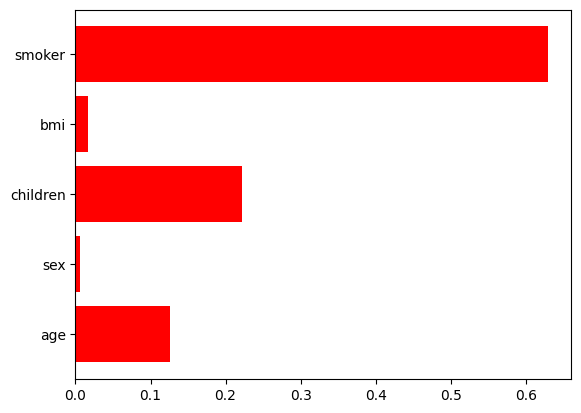

In [ ]:
features=['age','sex','children','bmi','smoker']
plt.barh(features,rf.feature_importances_,color='red')
# This graph shows that smokers have maximum importance for our target variable 'charges' which means that people
# with smoking habits pay higher medical charges